#**APRESENTAÇÃO**

Apresenta-se a seguir análise exploratória de dados referentes a clientes de empresa do setor financeiro. Este trabalho tem como objetivo identificar o perfil daqueles clientes com maior probabilidade de evasão. As seguintes informações serão analisadas:

1. CustomerId: identificação do cliente.

2. Surname: sobrenome do cliente.

3. CreditScore: pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência.

4. Geography: país que o serviço é oferecido.

5. Gender: sexo do cliente.

6. Age: idade do cleinte.

7. Tenure: um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade.

8. Balance: saldo da conta corrente.

9. NumOfProducts: número de produtos bancários adquiridos.

10. HasCrCard: se tem cartão de credito ou não, (Sim = 1 e Não = 0).

11. IsActiveMember: se é um cliente com conta ativa, (Ativo = 1).

12. EstimatedSalary: salário estimado.

13. Exited: cliente deixou de ser cliente do banco ou não (Churn = 1).

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

 # **OBSERVAÇÕES INICIAIS** 

In [3]:
df_churn = pd.read_csv('churn - Copia.csv', index_col = 'RowNumber', sep=',')

In [4]:
# informações sobre a tabela
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
# exposição das cinco primeiras linhas da tabela 
df_churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Rastreando dados duplicados
df_churn.duplicated().sum()

0

In [7]:
# Rastreando NaN
df_churn.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Deletando colunas de identificação (que não apresentam dados relevantes(qualitativos ou quantitativos))
arr_delete = ['CustomerId', 'Surname']
df_churn.drop(arr_delete, axis=1, inplace = True)
df_churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [9]:
# Separando as Features qualitativas das quantitativas
arr_quali = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
arr_quanti = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

df_churn_quali = df_churn[arr_quali]
df_churn_quanti = df_churn[arr_quanti]

In [10]:
# Nas Features quantitativas fez-se os estudos estatísticos para compreender a distribuição dos dados
df_churn_quanti.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,650.53,38.92,5.01,76485.89,1.53,100090.24,0.2
std,96.65,10.49,2.89,62397.41,0.58,57510.49,0.4
min,350.00,18.00,0.00,0.00,1.00,11.58,0.0
25%,584.00,32.00,3.00,0.00,1.00,51002.11,0.0
50%,652.00,37.00,5.00,97198.54,1.00,100193.92,0.0
75%,718.00,44.00,7.00,127644.24,2.00,149388.25,0.0
max,850.00,92.00,10.00,250898.09,4.00,199992.48,1.0


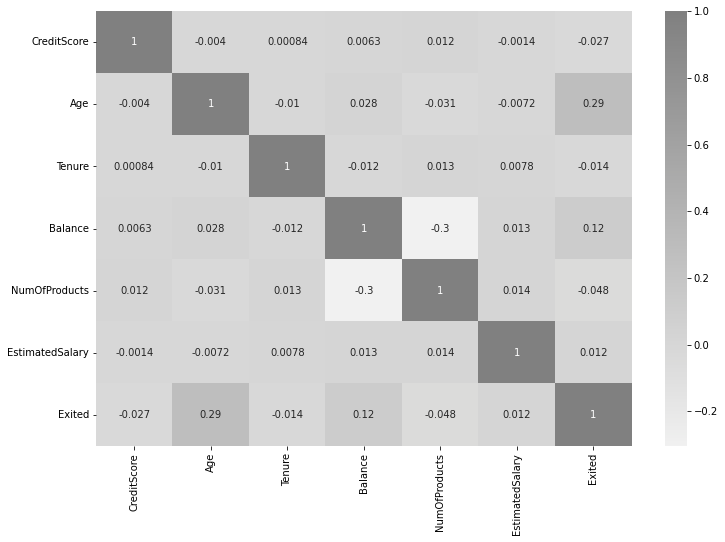

In [11]:
# Verificando a correlação
corr_churn = df_churn_quanti.corr()
sns.heatmap(
    data=corr_churn, annot=True, linewidths=0, cmap=sns.color_palette(
        "light:grey", as_cmap=True), cbar=True).figure.set_size_inches(12, 8)

In [12]:
# Nas Features qualitativas verificou-se a quantidade por categorias
df_churn.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
df_churn.groupby(['Exited']).Geography.value_counts()

Exited  Geography
0       France       4204
        Spain        2064
        Germany      1695
1       Germany       814
        France        810
        Spain         413
Name: Geography, dtype: int64

In [14]:
df_churn.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
df_churn.groupby(['Exited']).Gender.value_counts()

Exited  Gender
0       Male      4559
        Female    3404
1       Female    1139
        Male       898
Name: Gender, dtype: int64

In [16]:
df_churn.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [17]:
df_churn.groupby(['Exited']).HasCrCard.value_counts()

Exited  HasCrCard
0       1            5631
        0            2332
1       1            1424
        0             613
Name: HasCrCard, dtype: int64

In [18]:
df_churn.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [19]:
df_churn.groupby(['Exited']).IsActiveMember.value_counts()

Exited  IsActiveMember
0       1                 4416
        0                 3547
1       0                 1302
        1                  735
Name: IsActiveMember, dtype: int64

# **LEVANTAMENTO DE HIPÓTESES**

Dados quantitativos:

Inicialmente, dentre os dados quantitativos, é possível perceber, pelo quadro de correlações, a existência de uma correlação positiva maior entre idade e saldo em conta corrente com o churn. Intuitivamente, também, é possível supor que o menor número de produtos pode ser determinante para a saída de clientes.

Dados quantitativos:

Verifica-se, a partir das observações iniciais, que, dentre as variáveis qualitativas, há uma maior evasão entre clientes franceses e alemães, porém, proporcionalmente, a evasão de clientes alemães é superior, evidenciando uma probabilidade maior, posto que o número total de franceses é visivelmente superior ao de alemães. Igualmente, verifica-se uma probabilidade maior de evasão entre clientes do gênero feminino, apesar de o total de clientes mulheres ser menor que o total de homens. Também evadem mais clientes com cartão de crédito que aqueles que não têm, assim  como os clientes não ativos.



#**ANÁLISE GRÁFICA**

**Análise isolada das variáveis em relação à variável-alvo**

In [20]:

df_gender_exited = df_churn.loc[(df_churn.Exited == 1), ['Gender', 'Exited']]
df_geography_exited = df_churn.loc[(df_churn.Exited == 1), ['Geography', 'Exited']]
df_age_exited = df_churn.loc[(df_churn.Exited == 1), ['Age', 'Exited']]
df_creditscore_exited = df_churn.loc[(df_churn.Exited == 1), ['CreditScore', 'Exited']]
df_tenure_exited = df_churn.loc[(df_churn.Exited == 1), ['Tenure', 'Exited']]
df_balance_exited = df_churn.loc[(df_churn.Exited == 1), ['Balance', 'Exited']]
df_numofproducts_exited = df_churn.loc[(df_churn.Exited == 1), ['NumOfProducts', 'Exited']]
df_hascrcard_exited = df_churn.loc[(df_churn.Exited == 1), ['HasCrCard', 'Exited']]
df_isactivemember_exited = df_churn.loc[(df_churn.Exited == 1), ['IsActiveMember', 'Exited']]
df_estimatedsalary_exited =df_churn.loc[(df_churn.Exited == 1), ['EstimatedSalary', 'Exited']]

**CreditScore**

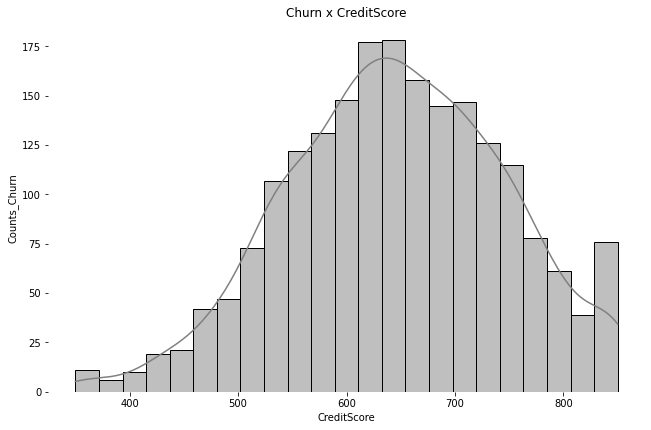

In [21]:
sns.displot(
    data=df_creditscore_exited, x='CreditScore', color='grey', kde=True).despine(
        bottom=True, left=True, right=True, top=True).set(
            ylabel=('Counts_Churn'), xlabel=('CreditScore'), title=('Churn x CreditScore')).figure.set_size_inches(10, 6)

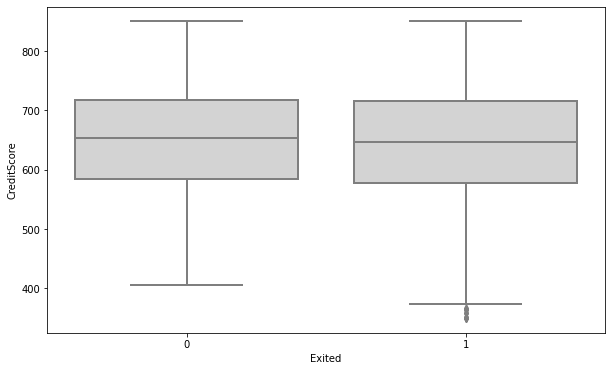

In [22]:
sns.boxplot(
        data=df_churn
        , x='Exited'
        , y='CreditScore'
        , fliersize=5
        , width = 0.8
        , linewidth=2
        , palette=sns.color_palette(['lightgrey'])).figure.set_size_inches(10, 6)

Verifica-se, a partir da leitura dos gráficos, maior concentração de clientes evadidos com creditscore entre 600 e 650.

**Age**

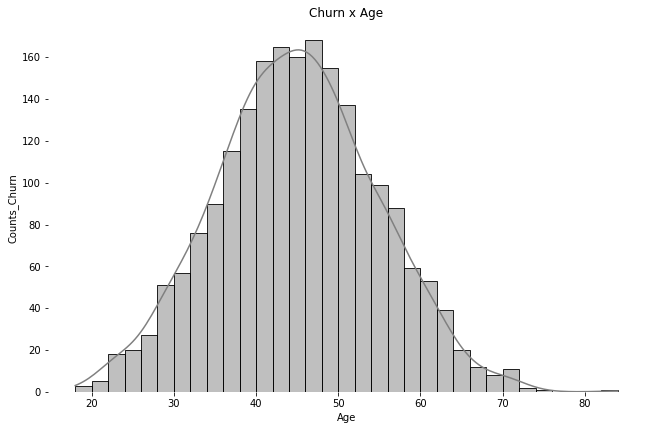

In [23]:
sns.displot(
    data=df_age_exited, x='Age', color='grey', kde=True).despine(
        bottom=True, left=True, right=True, top=True).set(
            ylabel=('Counts_Churn'), xlabel=('Age'), title=('Churn x Age')).figure.set_size_inches(10, 6)

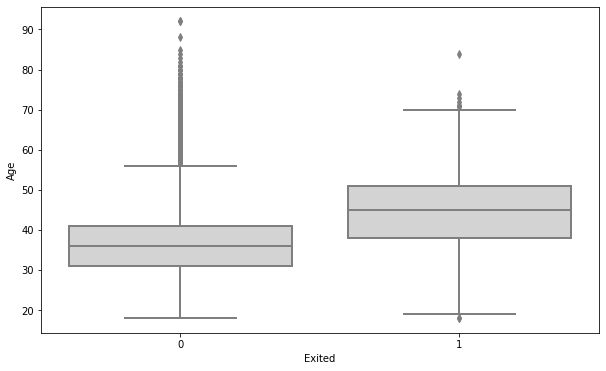

In [24]:
sns.boxplot(data=df_churn, x='Exited', y='Age', fliersize=5, width=0.8, linewidth=2, color='lightgrey').figure.set_size_inches(10, 6)

Identifica-se maior probabilidade de evasão para clientes com idades entre 40 e 50 anos.

**Tenure**

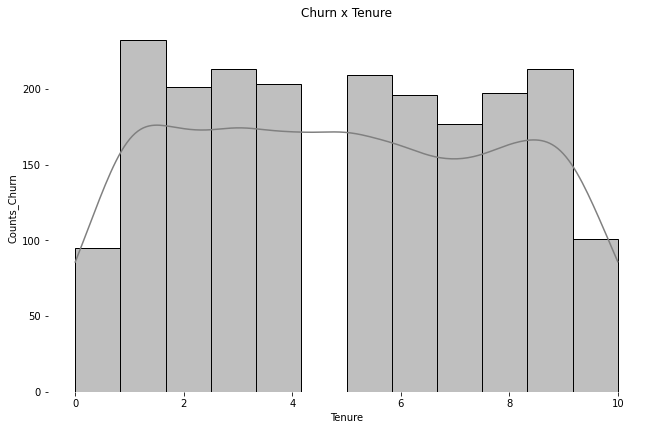

In [25]:
sns.displot(
    data=df_tenure_exited, x='Tenure', color='grey', kde=True).despine(
        bottom=True, left=True, right=True, top=True).set(
            ylabel=('Counts_Churn'), xlabel=('Tenure'), title=('Churn x Tenure')).figure.set_size_inches(10, 6)

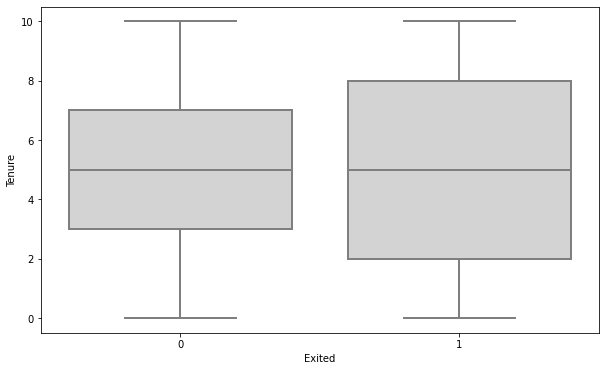

In [26]:
sns.boxplot(data=df_churn, x='Exited', y='Tenure', fliersize=5, width=0.8, linewidth=2, color='lightgrey').figure.set_size_inches(10, 6)

Nenhum padrão identificado que permita inferir mensurar a probabilidade de evasão em função da estabilidade de renda do cliente.

**Balance**

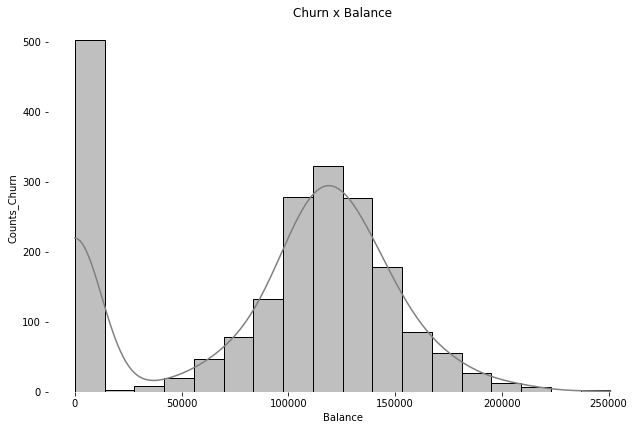

In [27]:
sns.displot(
    data=df_balance_exited, x='Balance', color='grey', kde=True).despine(
        bottom=True, left=True, right=True, top=True).set(
            ylabel=('Counts_Churn'), xlabel=('Balance'), title=('Churn x Balance')).figure.set_size_inches(10, 6)

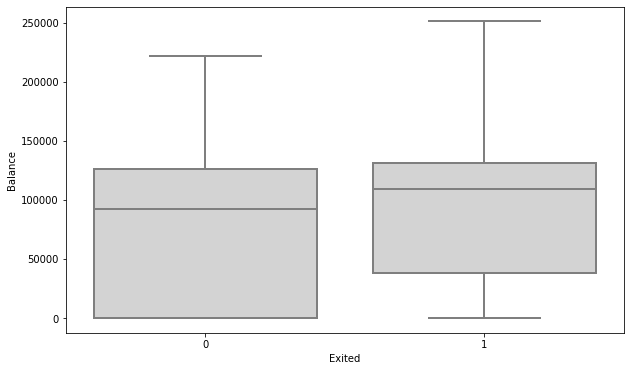

In [28]:
sns.boxplot(
        data=df_churn
        , x='Exited'
        , y='Balance'
        , fliersize=5
        , width = 0.8
        , linewidth=2
        , palette=sns.color_palette(['lightgrey'])).figure.set_size_inches(10, 6)

Verifica-se alta evasão de clientes com saldo \$ 12.000,00 (doze mil), mas também há um padrão de concentração de saída para clientes com saldo entre \$ 100.000,00 (cem mil) e \$ 140.000,00 (cento e quarenta mil).

**NumOfProducts**

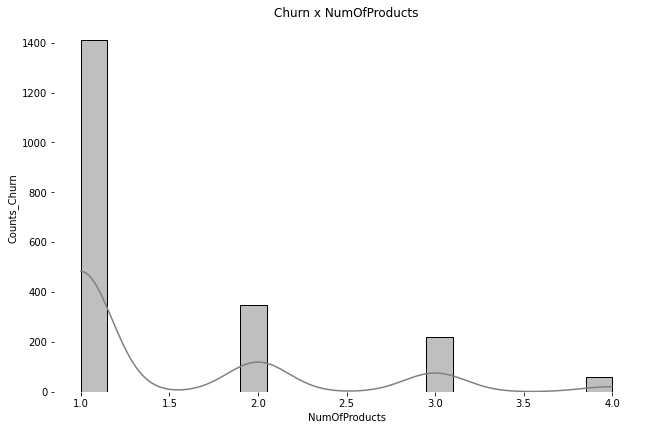

In [29]:
sns.displot(
    data=df_numofproducts_exited, x='NumOfProducts', color='grey', kde=True).despine(
        bottom=True, left=True, right=True, top=True).set(
            ylabel=('Counts_Churn'), xlabel=('NumOfProducts'), title=('Churn x NumOfProducts')).figure.set_size_inches(10, 6)

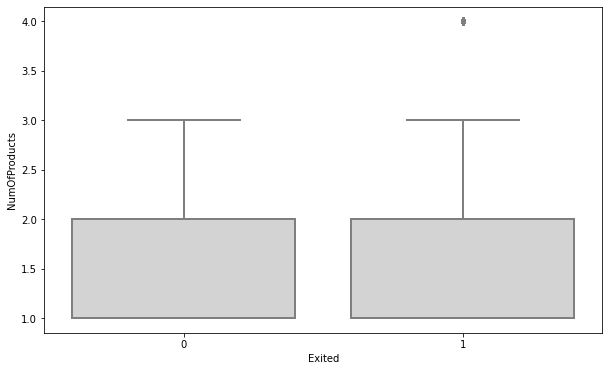

In [30]:
sns.boxplot(
        data=df_churn
        , x='Exited'
        , y='NumOfProducts'
        , fliersize=5
        , width = 0.8
        , linewidth=2
        , palette=sns.color_palette(['lightgrey'])).figure.set_size_inches(10, 6)

Percebe-se, através da visualização do histograma, que há uma concentração de saída de clientes com um ou nenhum produto.

**EstimatedSalary**

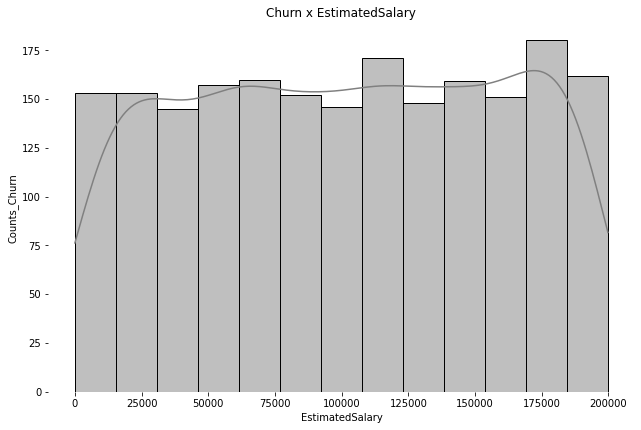

In [31]:
sns.displot(
    data=df_estimatedsalary_exited, x='EstimatedSalary', color='grey', kde=True).despine(
        bottom=True, left=True, right=True, top=True).set(
            ylabel=('Counts_Churn'), xlabel=('EstimatedSalary'), title=('Churn x EstimatedSalary')).figure.set_size_inches(10, 6)

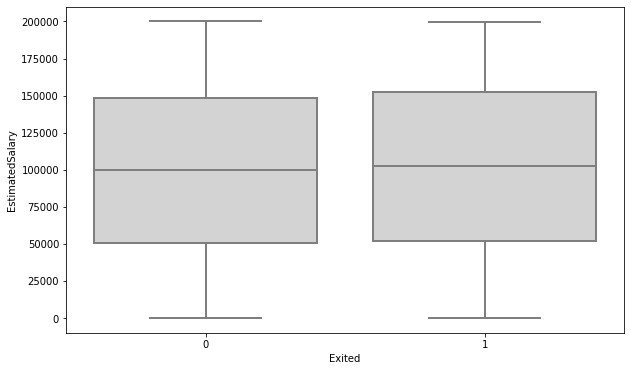

In [32]:
sns.boxplot(
        data=df_churn
        , x='Exited'
        , y='EstimatedSalary'
        , fliersize=5
        , width = 0.8
        , linewidth=2
        , palette=sns.color_palette(['lightgrey'])).figure.set_size_inches(10, 6)

Nenhum padrão identificado que permita inferir mensurar a probabilidade de evasão em função do salário estimado do cliente.

**Geography**

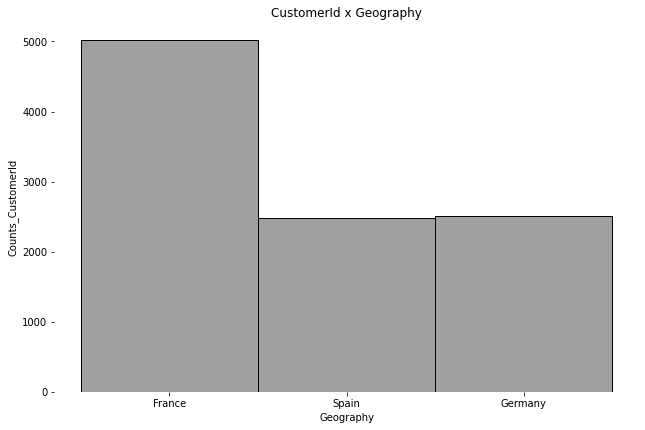

In [33]:
sns.displot(
    data=df_churn_quali, x='Geography', color='grey').despine(
        bottom=True, left=True, right=True, top=True).set(
            ylabel=('Counts_CustomerId'), xlabel=('Geography'), title=('CustomerId x Geography')).figure.set_size_inches(10, 6)

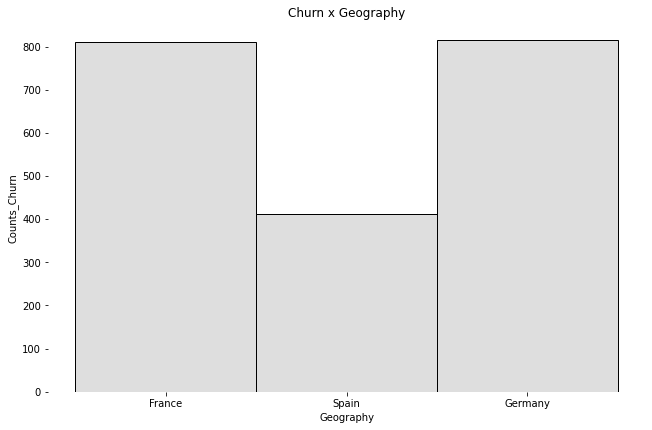

In [34]:
sns.displot(
    data=df_geography_exited, x='Geography', color='lightgrey').despine(
        bottom=True, left=True, right=True, top=True).set(
            ylabel=('Counts_Churn'), xlabel=('Geography'), title=('Churn x Geography')).figure.set_size_inches(10, 6)

Percebe-se uma maior probabilidade de evasão de clientes alemães.

**Gender**

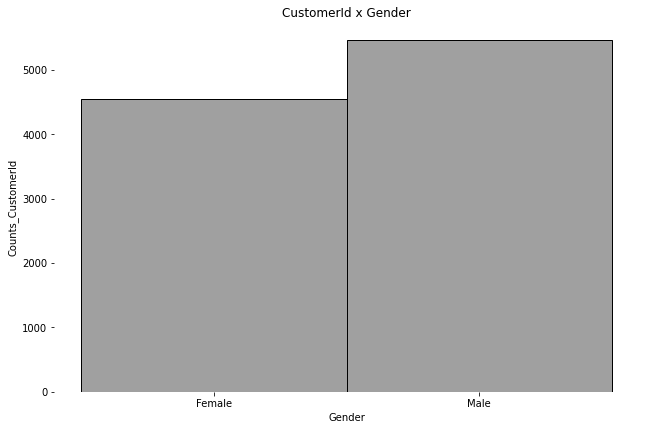

In [35]:
sns.displot(
    data=df_churn_quali, x='Gender', color='grey').despine(
        bottom=True, left=True, right=True, top=True).set(
            ylabel=('Counts_CustomerId'), xlabel=('Gender'), title=('CustomerId x Gender')).figure.set_size_inches(10, 6)

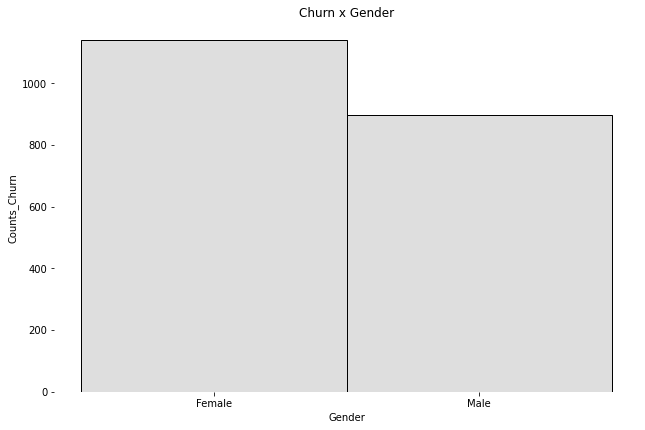

In [36]:
sns.displot(
    data=df_gender_exited, x='Gender', color='lightgrey').despine(
        bottom=True, left=True, right=True, top=True).set(
            ylabel=('Counts_Churn'), xlabel=('Gender'), title=('Churn x Gender')).figure.set_size_inches(10, 6)

Verifica-se uma maior probabilidade de evasão de mulheres.

**HasCrCard**

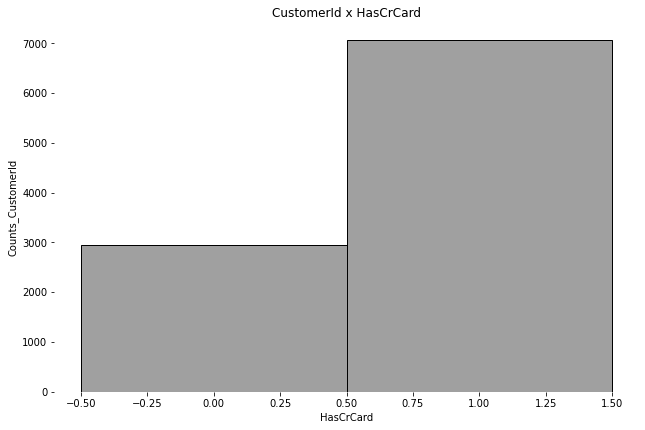

In [37]:
sns.displot(
    data=df_churn_quali, x='HasCrCard', color='grey', discrete=True).despine(
        bottom=True, left=True, right=True, top=True).set(
            ylabel=('Counts_CustomerId'), xlabel=('HasCrCard'), title=('CustomerId x HasCrCard')).figure.set_size_inches(10, 6)

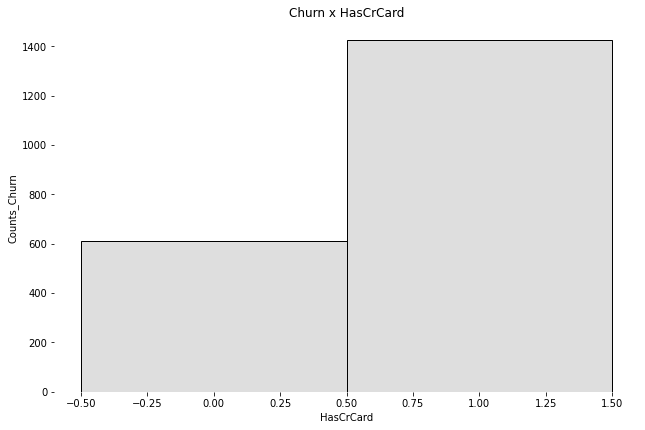

In [38]:
sns.displot(
    data=df_hascrcard_exited, x='HasCrCard', color='lightgrey', discrete=True).despine(
        bottom=True, left=True, right=True, top=True).set(
            ylabel=('Counts_Churn'), xlabel=('HasCrCard'), title=('Churn x HasCrCard')).figure.set_size_inches(10, 6)

O alto índice de evasão de clientes com cartão justifica-se pelo elevado número de clientes totais comn cartão, logo não é possível afirmar que há uma tenbdência de evasão de clientes que possuem cartão.

**IsActiveMember**

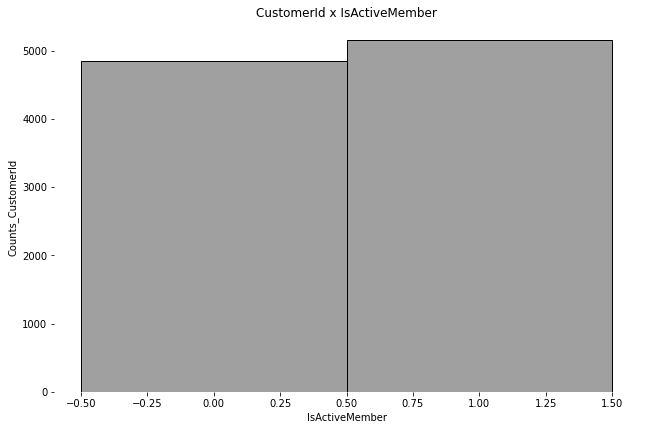

In [39]:
sns.displot(
    data=df_churn_quali, x='IsActiveMember', color='grey', discrete=True).despine(
        bottom=True, left=True, right=True, top=True).set(
            ylabel=('Counts_CustomerId'), xlabel=('IsActiveMember'), title=('CustomerId x IsActiveMember')).figure.set_size_inches(10, 6)

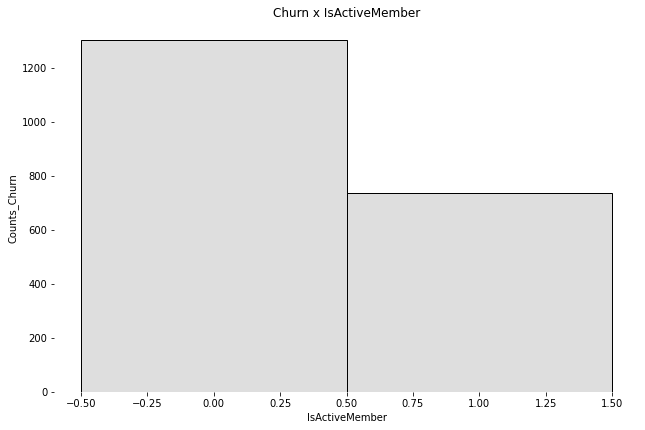

In [40]:
sns.displot(
    data=df_isactivemember_exited, x='IsActiveMember', color='lightgrey', discrete=True).despine(
        bottom=True, left=True, right=True, top=True).set(
            ylabel=('Counts_Churn'), xlabel=('IsActiveMember'), title=('Churn x IsActiveMember')).figure.set_size_inches(10, 6)

Identifica-se uma maior probabilidade de evasão de clientes não ativos.

# **CONCLUSÃO**

A partir das análises efetivadas é possível concluir que o perfil de cliente com maior probabilidade de evasão é a cliente mulher do sexo feminino, alemã, com credit score entre 600 e 650, idade entre 40 e 50 anos, saldo abaixo de \$ 12.000,00 (doze mil), com um ou nenhum produto e membro não ativo.